# 电影评论分类

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'2.0.0'

## 读入并查看数据集

In [2]:
# num_words规定了最多包含多少单词，根据单词在训练集中出现的次数进行排序，选取前num_words个单词
num_words = 10000
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)

In [3]:
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

x_train.shape: (25000,)
x_test.shape: (25000,)


In [4]:
# 训练集有25000个样本，每个样本评论是一个列表，数字代表单词对应的index
x_train[:3]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
# 前三条评论的长度
for i in x_train[:3]:
    print(len(i))

218
189
141


In [6]:
y_train.shape

(25000,)

In [7]:
y_train[:3]

array([1, 0, 0], dtype=int64)

## 数据预处理

In [8]:
# 因为每条评论长度不同，需要规定长度，对短句进行填充，对长句进行截断
max_len = 300
x_train = keras.preprocessing.sequence.pad_sequences(x_train, max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, max_len)
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

x_train.shape: (25000, 300)
x_test.shape: (25000, 300)


## 构建模型训练

In [9]:
model = keras.models.Sequential()
model.add(layers.Embedding(input_dim=num_words,
                           output_dim=50,
                           input_length=max_len))
model.add(layers.GlobalAvgPool1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                3264      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 503,329
Trainable params: 503,329
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
train = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 7s 289us/sample - loss: 0.5370 - accuracy: 0.7412 - val_loss: 0.3344 - val_accuracy: 0.8678
Epoch 2/10
25000/25000 [==============================] - 6s 257us/sample - loss: 0.2804 - accuracy: 0.8923 - val_loss: 0.2869 - val_accuracy: 0.8837
Epoch 3/10
25000/25000 [==============================] - 6s 254us/sample - loss: 0.2179 - accuracy: 0.9210 - val_loss: 0.2823 - val_accuracy: 0.8867
Epoch 4/10
25000/25000 [==============================] - 6s 258us/sample - loss: 0.1811 - accuracy: 0.9368 - val_loss: 0.2902 - val_accuracy: 0.8821
Epoch 5/10
25000/25000 [==============================] - 6s 256us/sample - loss: 0.1557 - accuracy: 0.9463 - val_loss: 0.3286 - val_accuracy: 0.8720
Epoch 6/10
25000/25000 [==============================] - 6s 257us/sample - loss: 0.1384 - accuracy: 0.9542 - val_loss: 0.3293 - val_accuracy: 0.8763
Epoch 7/10
25000/25000 [==========================

## 训练过程可视化

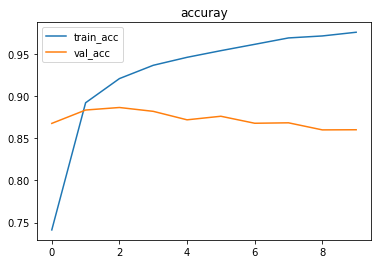

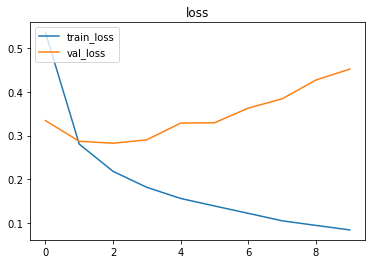

In [11]:
import matplotlib.pyplot as plt
train_acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
train_loss = train.history['loss']
val_loss = train.history['val_loss']

plt.title("accuray")
plt.plot(train.epoch, train_acc, label='train_acc')
plt.plot(train.epoch, val_acc, label='val_acc')
plt.legend(loc='upper left')

plt.figure()
plt.title("loss")
plt.plot(train.epoch, train_loss, label='train_loss')
plt.plot(train.epoch, val_loss, label='val_loss')
plt.legend(loc='upper left')